In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]



In [2]:
# these are parameterized over papermill
from cisclient.client import CISClient
from lcb.cisvis.spectra import generate_spectra_plot, generate_similarity_plot, to_dataframe, \
    generate_histogram_accurate_mass, generate_histogram_intensity, generate_head_tail_plot, generate_histogram_ri
cis_url = 'https://dev-api.metabolomics.us/cis'
cis_api_token = 'rDJfRW6ilG2WooOR72AaE3NqL4m23WvY6ub4FEoS'
library = "soqe[M+H][M+NH4] | QExactive | test | positive"

In [3]:

client =  CISClient(cis_url, cis_api_token)
data = []
compounds = client.get_compounds_by_type(library=library,target_type='CONFIRMED_CONSENSUS',autopage=True)

In [4]:
print("{} contains {} confirmed compounds".format(library,len(compounds)))

soqe[M+H][M+NH4] | QExactive | test | positive contains 6 confirmed compounds


In [5]:
for splash in compounds:
    compound = client.get_compound(library=library, splash=splash)
    data.append(compound)


this plot plots all similarity scores of this library against each other

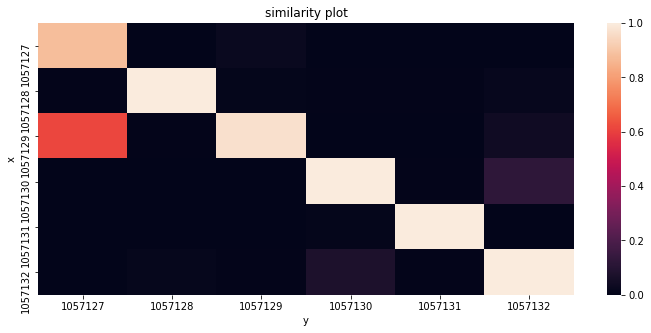

In [6]:
sim = generate_similarity_plot(data)
lib = to_dataframe(data)
lib['members'] = lib['splash'].apply(lambda x: list(map(lambda y: client.get_compound(library=library,splash=y),client.get_members(library=library,splash=x,autopage=True))))

lib_to_show = lib.drop(['accurate_mass','spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)

this is the content of the actual library

In [7]:
lib_to_show

,id,matrix,retention_index,sample,precursor_mass,members
0,1057132,,317.257783,consensus spectrum from 1 samples,790.571655,"[{'id': 1057132, 'accurate_mass': 790.57165527..."
1,1057131,,55.071360,consensus spectrum from 1 samples,511.282318,"[{'id': 1057131, 'accurate_mass': 511.28231811..."
2,1057130,,88.158306,consensus spectrum from 1 samples,526.319214,"[{'id': 1057130, 'accurate_mass': 526.31921386..."
3,1057129,,625.353465,consensus spectrum from 1 samples,699.678162,"[{'id': 1057129, 'accurate_mass': 699.67816162..."
4,1057128,,122.133260,consensus spectrum from 1 samples,545.363525,"[{'id': 1057128, 'accurate_mass': 545.36352539..."
5,1057127,,650.124603,consensus spectrum from 1 samples,680.633484,"[{'id': 1057127, 'accurate_mass': 680.63348388..."


This is a visualization of the spectra each consensus is made up off

/home/wohlgemuth/workspace/carpy/lcb/.venv/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/wohlgemuth/workspace/carpy/lcb/.venv/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/wohlgemuth/workspace/carpy/lcb/.venv/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/wohlgemuth/workspace/carpy/lcb/.venv/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/wohlgemuth/workspace/carpy/lcb/.venv/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel de

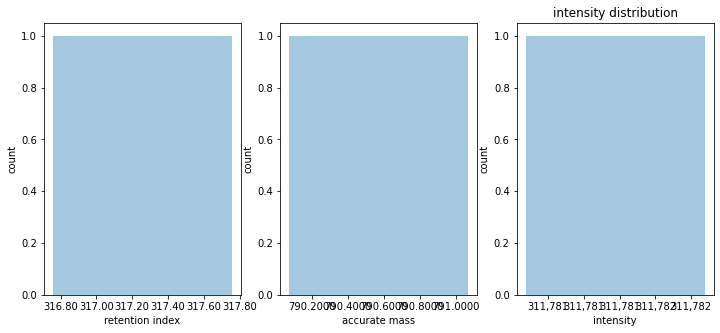

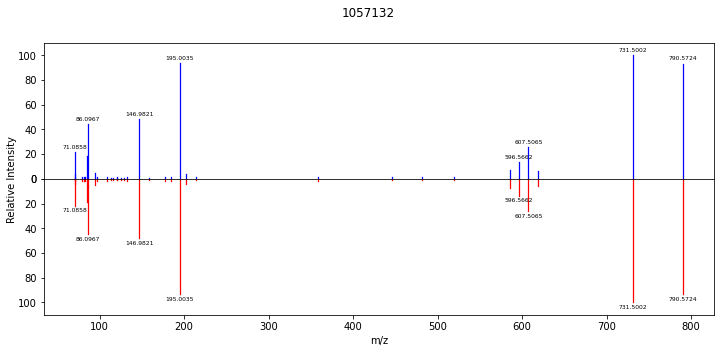

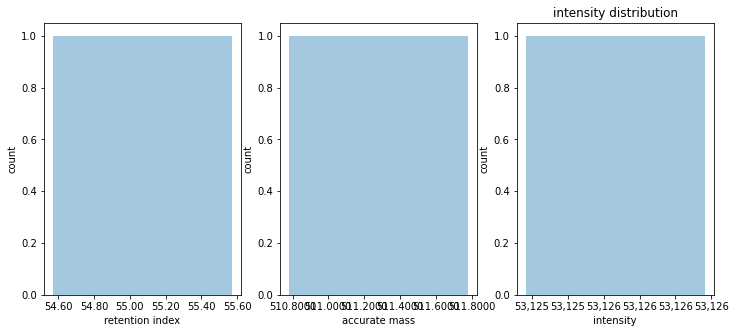

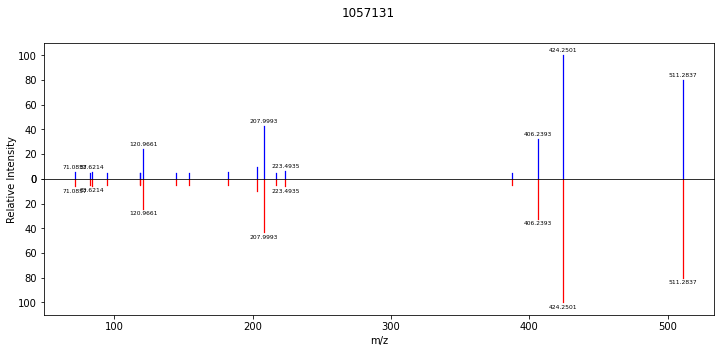

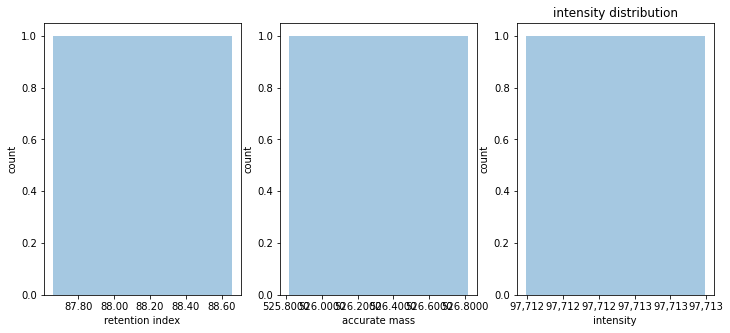

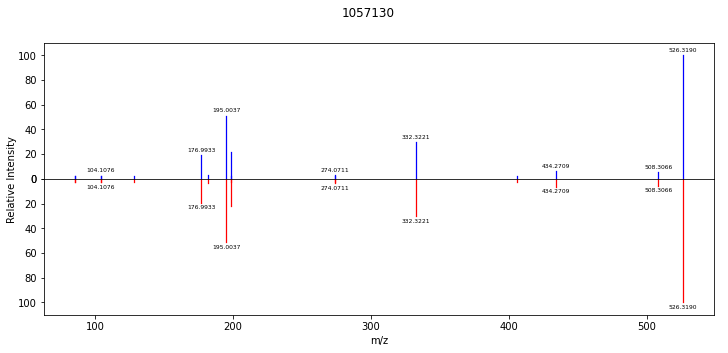

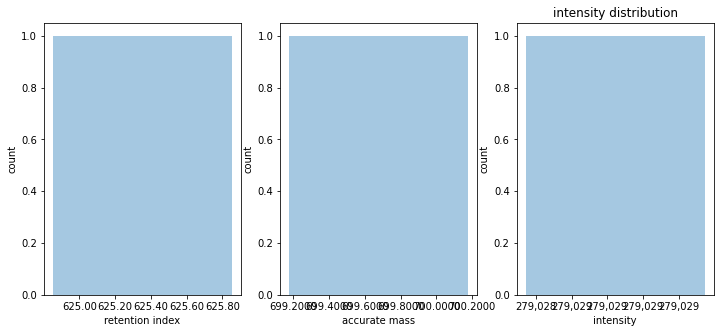

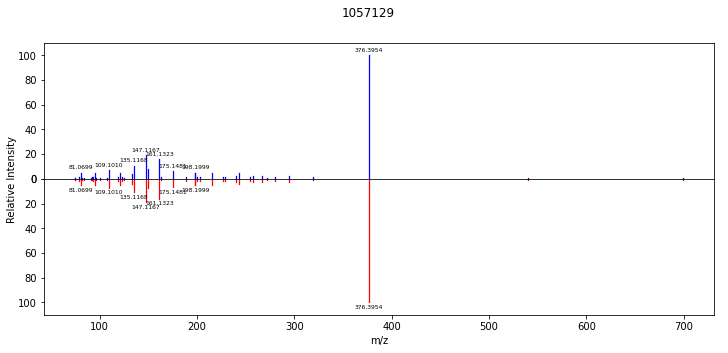

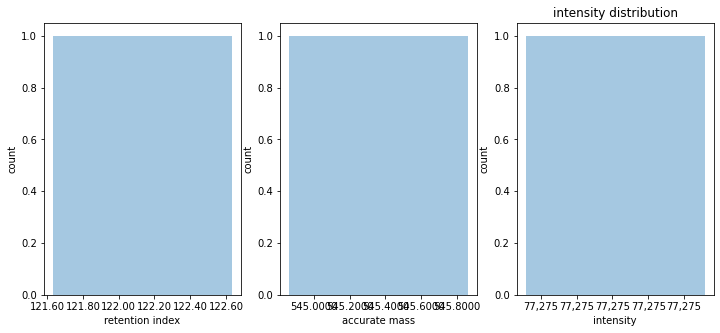

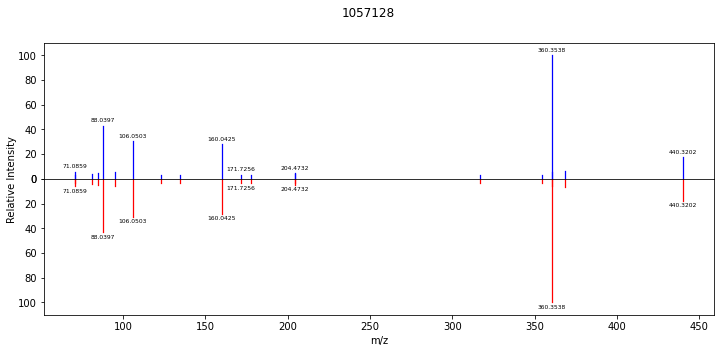

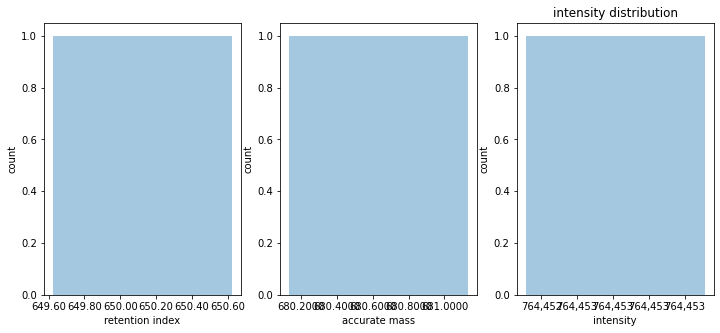

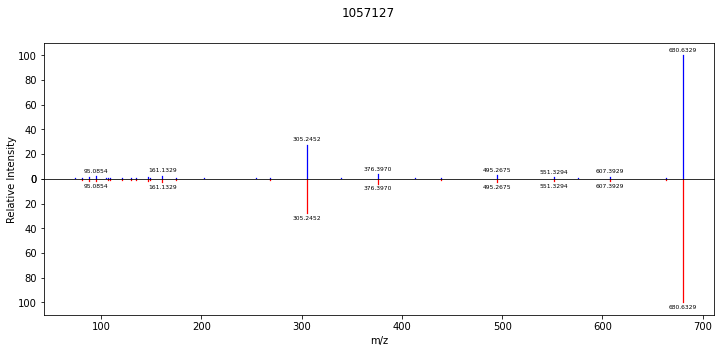

In [8]:
def show(compound,members):

    fig, axes = plt.subplots(1, 3)

    generate_histogram_ri(members,axes=axes[0])
    generate_histogram_accurate_mass(members,axes=axes[1])
    generate_histogram_intensity(members,axes=axes[2])

    plt.show()
    for member in members:
        generate_head_tail_plot(member=member,compound=compound)

    mem = to_dataframe(members).drop(['accurate_mass','spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)
    return mem
members = [show(compound, members) for compound, members in zip(lib['splash'].apply(lambda x: client.get_compound(library=library,splash=x)), lib['members'])]

